In [ ]:
!pip install salesforce-lavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 24.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 MB 33.3 MB/s eta 0:00:00

In [ ]:
import requests
import pandas as pd
from PIL import Image
import torch

In [ ]:
import torch
from PIL import Image
# setup device to use
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"
# load sample image
#raw_image = Image.open("/content/flower.jpg").convert("RGB")
#display(raw_image.resize((596, 437)))

In [ ]:
import torch
from lavis.models import load_model_and_preprocess
# loads BLIP-2 pre-trained model
model, vis_processors, _ = load_model_and_preprocess(
     name="blip2_opt", model_type="pretrain_opt2.7b", is_eval=True, device=device
 )# prepare the image
#image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

100%|██████████| 1.89G/1.89G [00:17<00:00, 115MB/s]


100%|██████████| 409M/409M [00:04<00:00, 90.8MB/s]


In [ ]:
import pandas as pd

#nh_df = pd.read_csv('/content/natural_history.csv')

#nh_df.head()

,site_url,page_url,src,alt
0,https://naturalhistory.si.edu,https://naturalhistory.si.edu/,https://naturalhistory.si.edu/sites/default/fi...,Smithsonian Logo white
1,https://naturalhistory.si.edu,https://naturalhistory.si.edu/,https://naturalhistory.si.edu/sites/default/fi...,A family looks out over Henry the elephant in ...
2,https://naturalhistory.si.edu,https://naturalhistory.si.edu/,https://naturalhistory.si.edu/sites/default/fi...,Two young women posing for a selfie as one of ...
3,https://naturalhistory.si.edu,https://naturalhistory.si.edu/,https://naturalhistory.si.edu/sites/default/fi...,a bright halo of stars over a dark landscape
4,https://naturalhistory.si.edu,https://naturalhistory.si.edu/,https://naturalhistory.si.edu/sites/default/fi...,a black man with orange hair kneeling under gi...


In [ ]:
def filter_src(string):
  if "eduhttps" in string:
    new_string = string.replace("https://naturalhistory.si.edu", "")
    return new_string
  elif 'edu//' in string:
    new_string = string.replace("https://naturalhistory.si.edu", "https:")
    return new_string
  else:
    return string

nh_df['src'] = nh_df['src'].map(filter_src)

In [ ]:
model_alts = []

for index, row in nh_df.iterrows():
  src = row['src']

  try:
    with Image.open(requests.get(src, stream=True).raw).convert("RGB") as curr_img:
      image = vis_processors["eval"](curr_img).unsqueeze(0).to(device)
      model_alt = model.generate({"image": image})
      model_alts.append(model_alt)
  except:
    print("Could not open image at " + src)
    model_alts.append(None)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
raw_image = Image.open("/content/panda.png").convert("RGB")
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
model.generate({"image": image})

['a black and white panda bear']

In [ ]:
nh_df = pd.read_csv('nh_museum.csv')

nh_df = nh_df[nh_df['alt'] != "Smithsonian Logo white"]

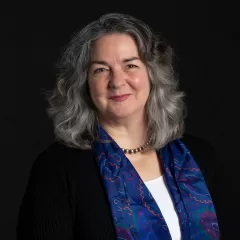



Current Alt: A headshot of Carol Butler, a white woman with gray hair wearing a white shirt, black sweater and colorful scarf. 

Model Alt: ['a woman with gray hair and a blue scarf']



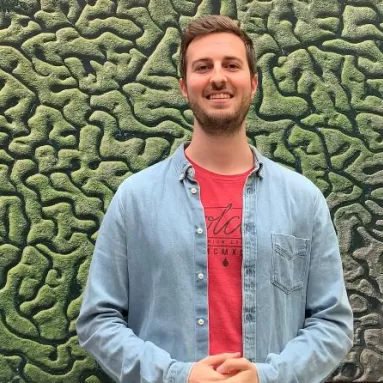



Current Alt: Headshot of Arlo Hinckley Boned

Model Alt: ['a man standing in front of a green wall']



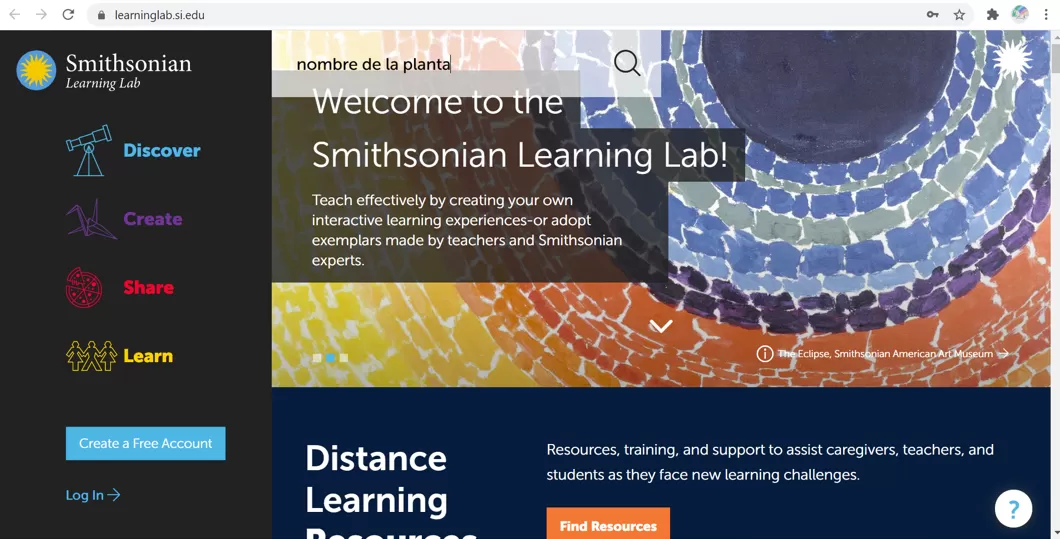



Current Alt: Image of a screenshot of the Smithsonian Learning Lab web homepage

Model Alt: ['the smithsonian learning lab website']



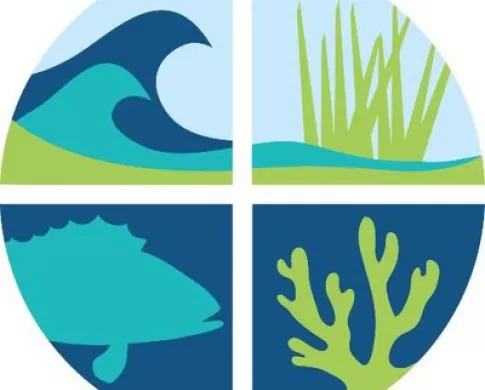



Current Alt: MarineGEO Logo

Model Alt: ['the logo for the national oceanic and atmospheric administration']



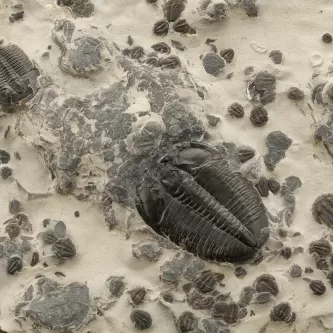



Current Alt: Image depicts a rock slab containing many trilobites of various sizes and taxa

Model Alt: ['a group of trilobites on a rock surface']



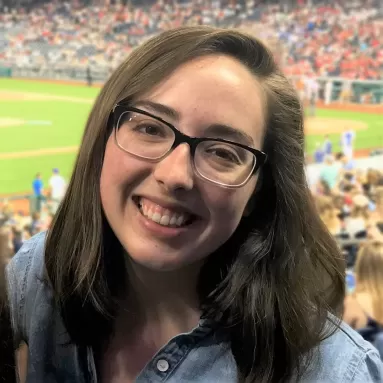



Current Alt: Crowe_Katherine_Anthro

Model Alt: ['a woman with glasses smiles at the camera at a baseball game']



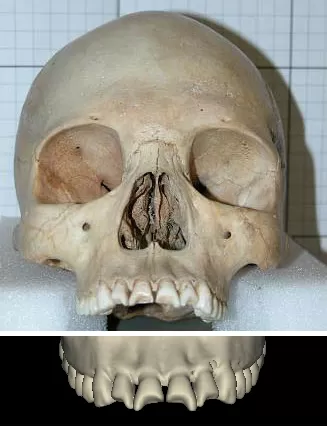



Current Alt: Frontal view of cranium of African American Woman showing notched teeth.

Model Alt: ['two images of a human skull, one with a tooth missing and the other with a missing tooth']



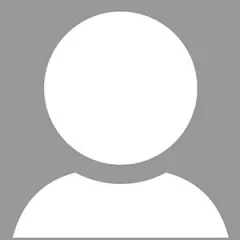



Current Alt: Staff Avatar Do Not Update!!! Remove, Add New Staff Item With Remove Button --->

Model Alt: ['an icon of a person on a gray background']



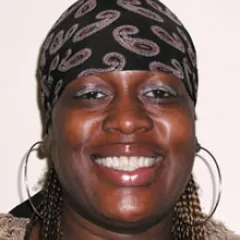



Current Alt: Carroll_Jackie_Vz

Model Alt: ['a smiling black woman wearing a bandana on her head']



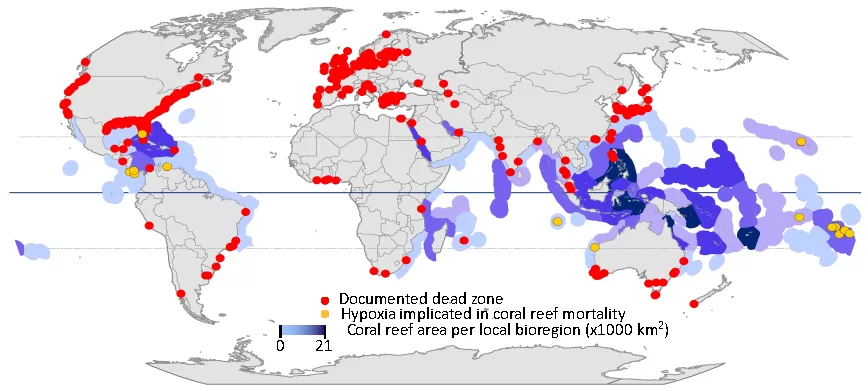



Current Alt: Coral Deadzone Map

Model Alt: ['a map of the world showing the different types of climate change']



In [ ]:
sample = nh_df.sample(10)

for index, row in sample.iterrows():

  src = row['src']

  with Image.open(requests.get(src, stream=True).raw).convert("RGB") as curr_img:
    display(curr_img)
    print("\n")
    print("Current Alt: " + row['alt'] + "\n")
    print("Model Alt: " + row['model_alts'] + "\n")


In [ ]:
nh_df['model_alts'].dtypes

dtype('O')